In [3]:
# standard import
import pandas as pd
import numpy as np

# sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans


# miscilaneous models
import openml
from ucimlrepo import fetch_ucirepo
import os
from scipy.cluster.hierarchy import linkage, cut_tree


# import warnings
# warnings.simplefilter(action="ignore", category=FutureWarning)
# warnings.filterwarnings("ignore", category=DeprecationWarning)

In [4]:
X = pd.read_csv("../data/data_parkinsons/X.csv")
y = pd.read_csv("../data/data_parkinsons/y.csv", header=None).values.ravel()

In [5]:
sorted_idx = X['sex_1'].argsort()

In [6]:
X.iloc[sorted_idx]

,age,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,Shimmer,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE,sex_1
0,72,0.00662,0.000034,0.00401,0.00317,0.01204,0.02565,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006,0
3321,60,0.00320,0.000027,0.00147,0.00183,0.00442,0.02717,0.240,0.01237,0.01533,0.02188,0.03712,0.013382,20.837,0.44109,0.72622,0.15063,0
3322,60,0.00736,0.000056,0.00383,0.00333,0.01150,0.04174,0.363,0.02219,0.02660,0.02967,0.06657,0.039739,15.802,0.53779,0.77603,0.26447,0
3323,60,0.00436,0.000038,0.00183,0.00224,0.00548,0.03468,0.305,0.01868,0.02035,0.02672,0.05605,0.021484,17.573,0.56131,0.75547,0.21999,0
3324,60,0.00502,0.000040,0.00218,0.00253,0.00654,0.02345,0.216,0.01101,0.01469,0.02055,0.03302,0.014082,21.474,0.52062,0.73551,0.19993,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4508,66,0.00470,0.000016,0.00261,0.00232,0.00782,0.02894,0.256,0.01606,0.01676,0.02043,0.04818,0.020676,19.349,0.49848,0.53687,0.25316,1
4507,66,0.00727,0.000028,0.00351,0.00294,0.01054,0.03587,0.320,0.01870,0.02109,0.02576,0.05610,0.029694,17.723,0.55605,0.55642,0.25455,1
4506,66,0.00715,0.000024,0.00409,0.00329,0.01228,0.04840,0.499,0.02759,0.02798,0.03582,0.08278,0.040506,15.990,0.57865,0.53150,0.22302,1
4519,66,0.00549,0.000019,0.00278,0.00232,0.00835,0.04437,0.404,0.02547,0.02359,0.03164,0.07640,0.028470,17.224,0.57329,0.52423,0.25990,1


In [7]:
X[X['sex_1']==0]["DFA"]

0       0.54842
1       0.56477
2       0.54405
3       0.57794
4       0.56122
         ...   
5870    0.55314
5871    0.56518
5872    0.57888
5873    0.56327
5874    0.57077
Name: DFA, Length: 4008, dtype: float64

In [8]:
# read in feature importances
base_dir = "../lfi-values/fulldata/rf/"
lotla_values = {}
shap_values = {}
lime_values = {}
women_count = {}
for seed in range(5):
    # split data into training and testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5,
                                                        random_state = seed)
    sorted_idx = X_test['sex_1'].argsort()
    women_count[seed] = np.bincount(X_test['sex_1'])[0]
    lotla_values[seed] = np.loadtxt(base_dir + f"seed{seed}/parkinsons/elastic_nonnormed_nosquared_rank.csv", delimiter=",")[sorted_idx]
    shap_values[seed] = np.loadtxt(base_dir + f"seed{seed}/parkinsons/shap.csv", delimiter=",")[sorted_idx]
    lime_values[seed] = np.loadtxt(base_dir + f"seed{seed}/parkinsons/lime.csv", delimiter=",")[sorted_idx]

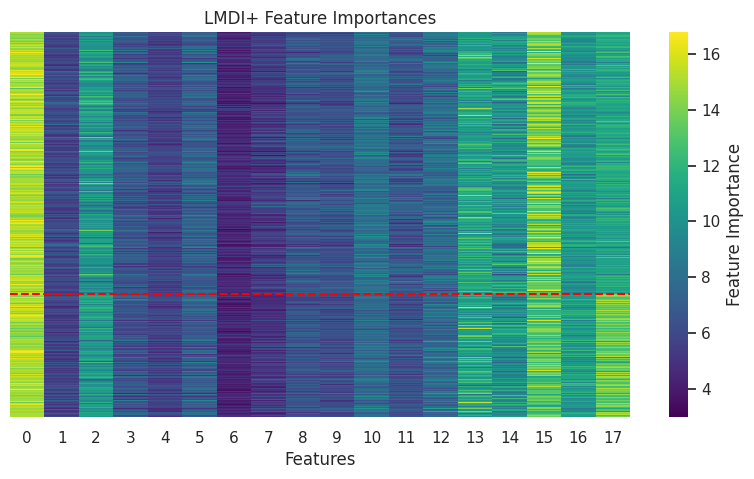

<Figure size 1000x500 with 0 Axes>

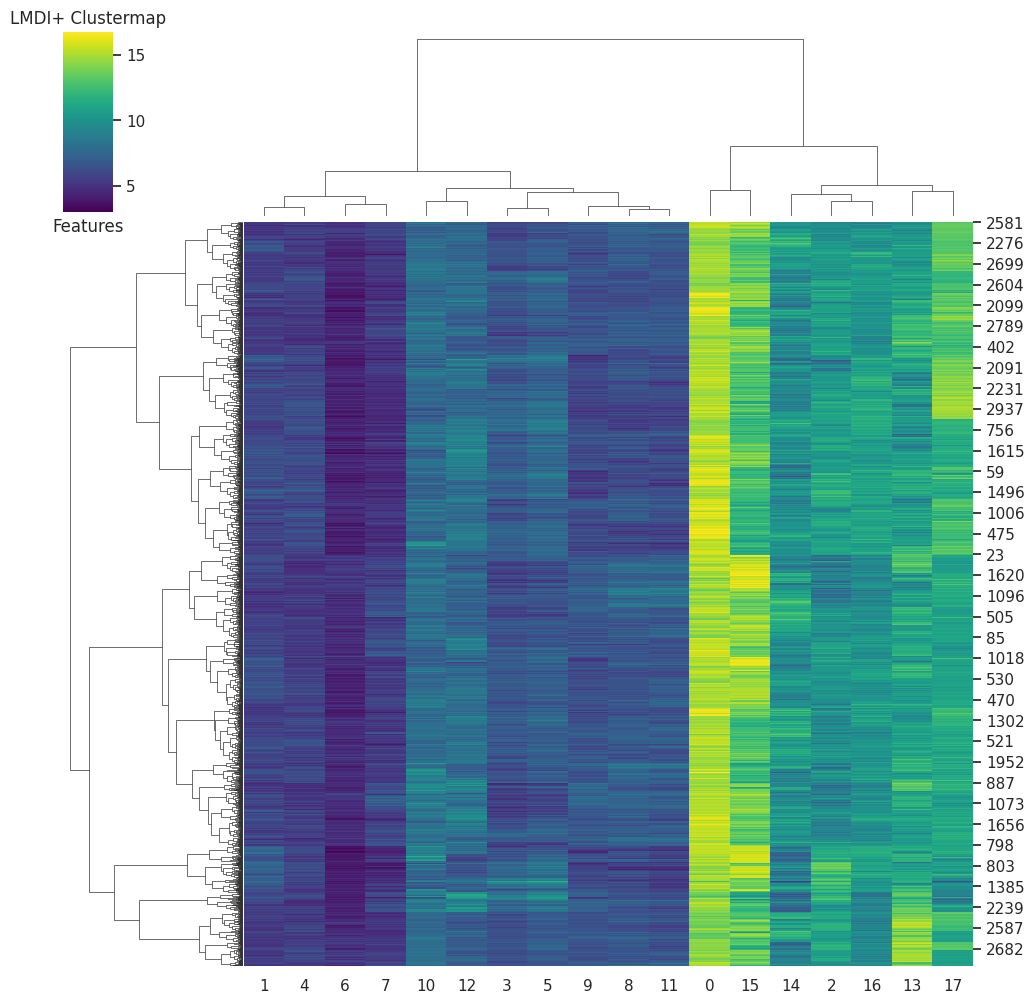

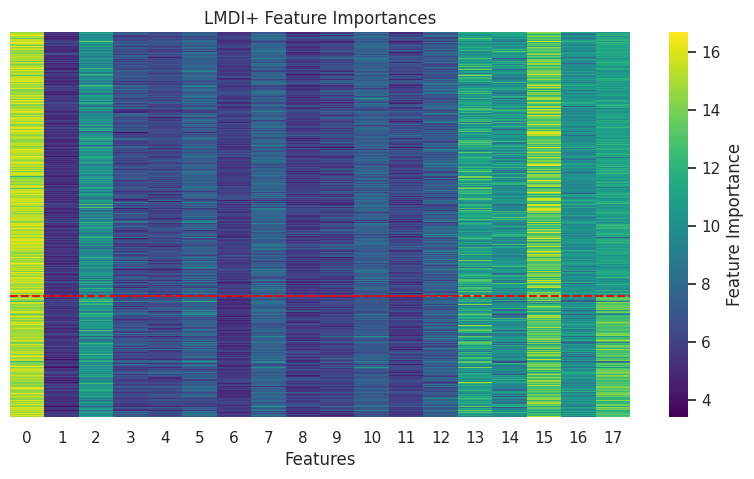

<Figure size 1000x500 with 0 Axes>

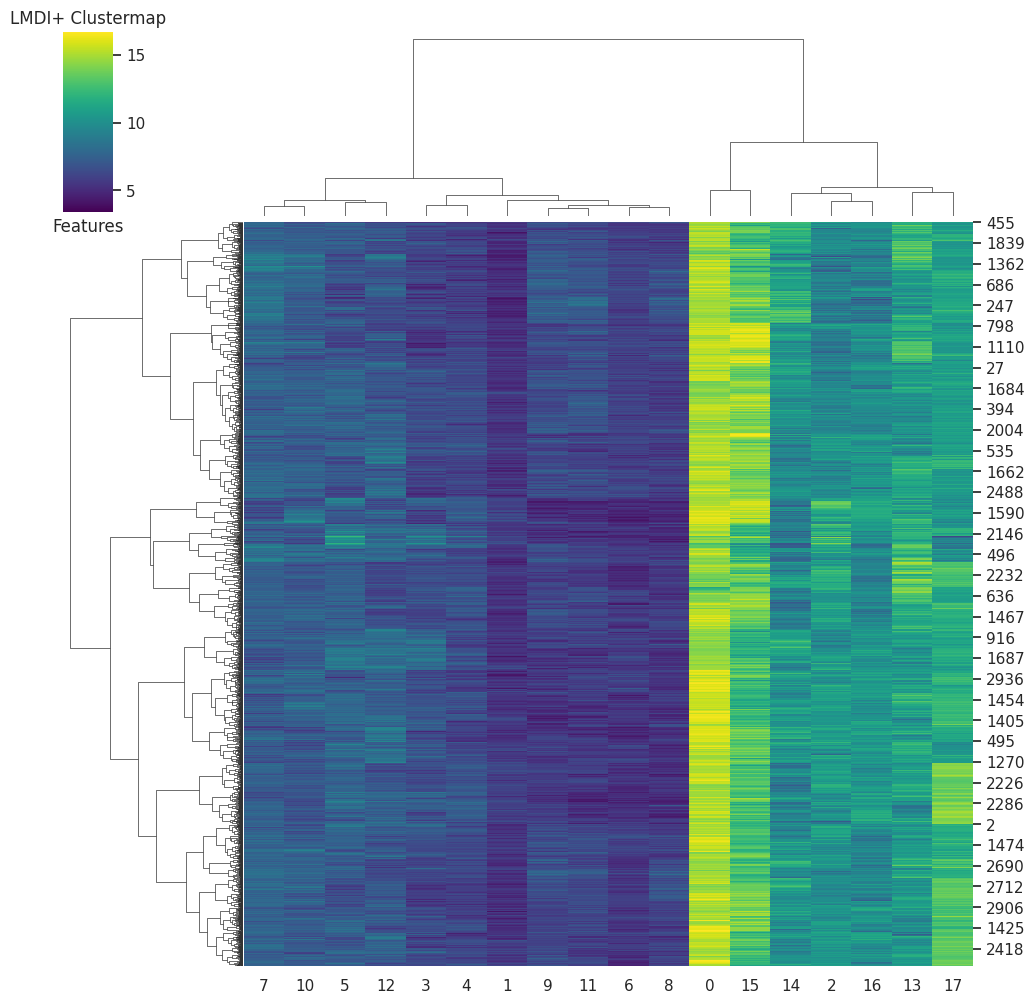

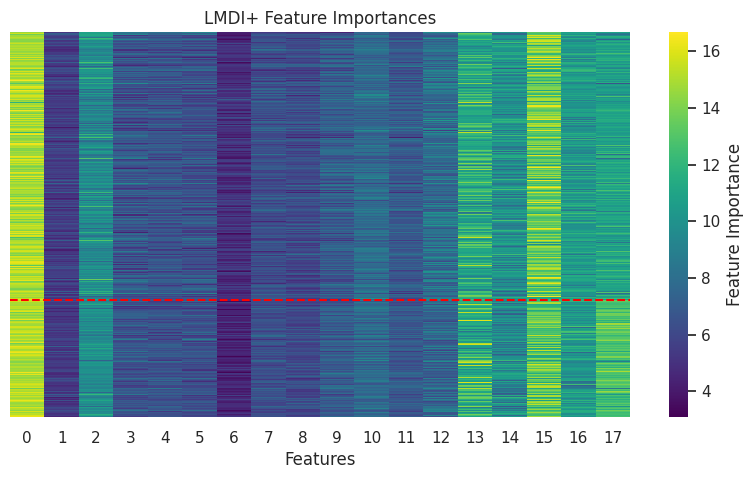

<Figure size 1000x500 with 0 Axes>

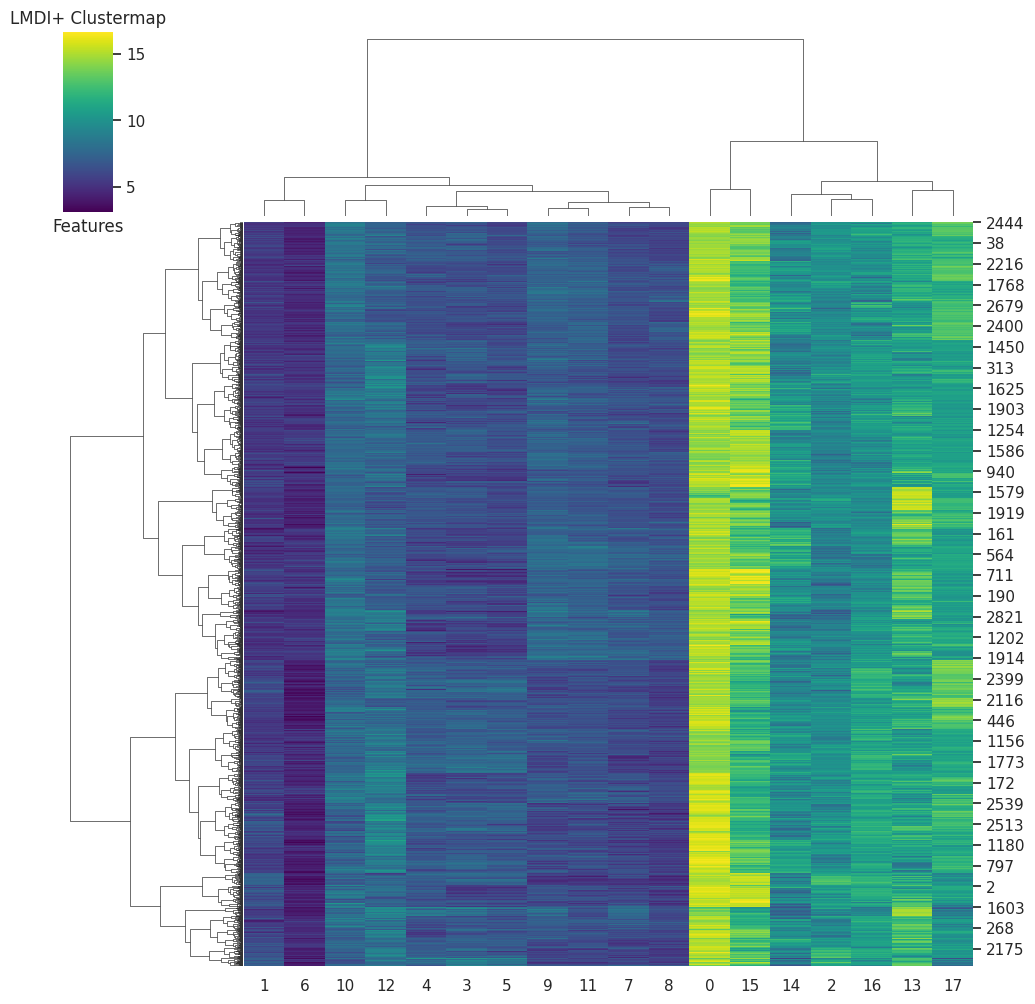

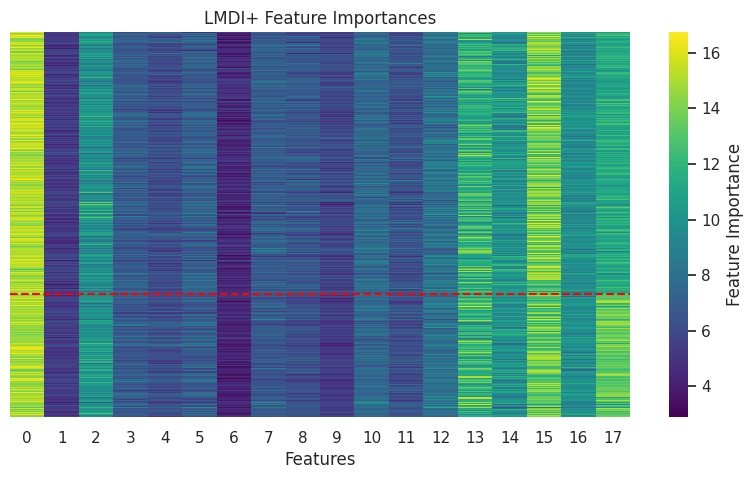

<Figure size 1000x500 with 0 Axes>

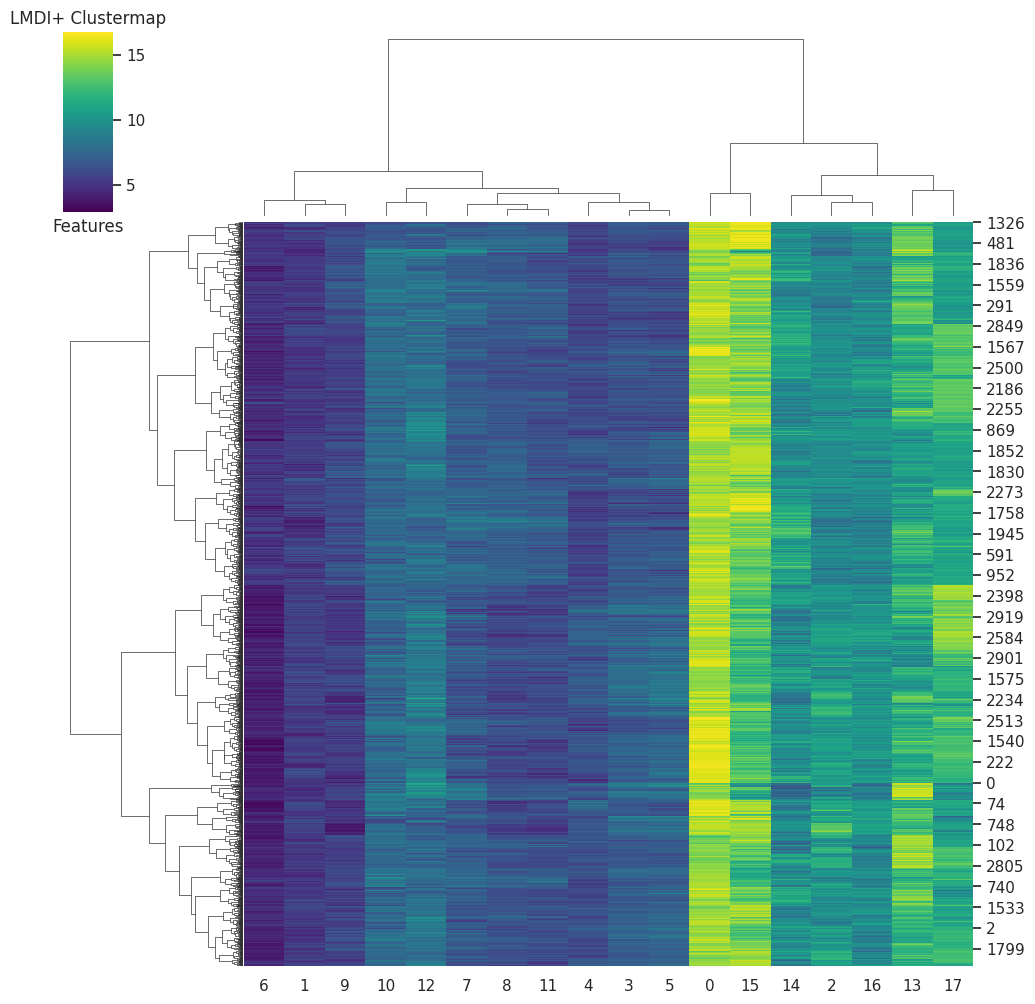

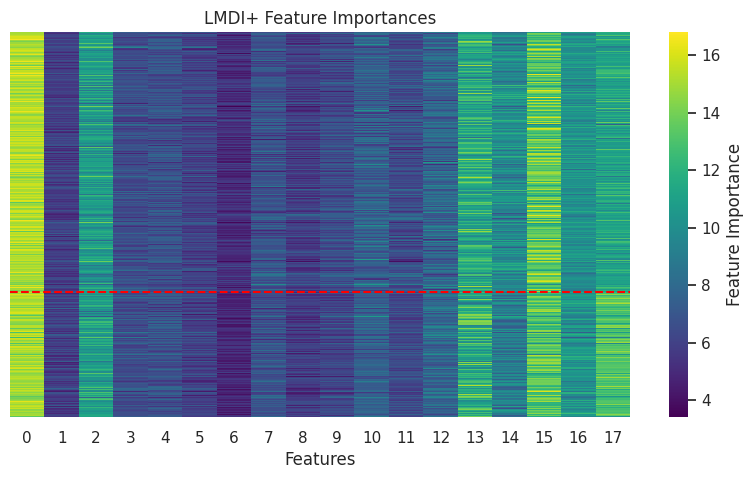

<Figure size 1000x500 with 0 Axes>

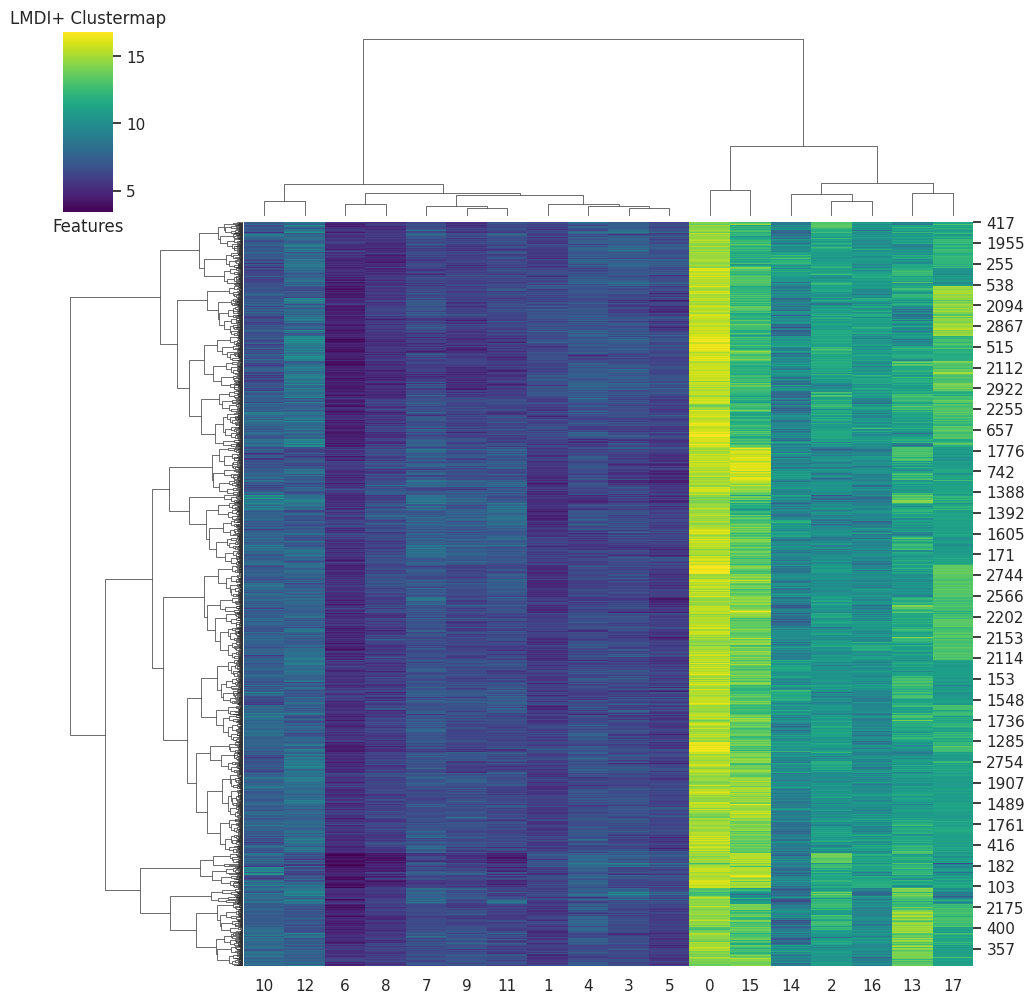

In [9]:
# plot heatmap of lotla values
import matplotlib.pyplot as plt
import seaborn as sns
for i in range(5):
    sns.set()
    plt.figure(figsize=(10, 5))
    sns.heatmap(lotla_values[i], cmap="viridis", cbar_kws={'label': 'Feature Importance'})
    plt.title("LMDI+ Feature Importances")
    plt.xlabel("Features")
    plt.ylabel("")
    plt.axhline(y=women_count[i], color='red', linestyle='--')
    plt.yticks([])
    plt.show()
    sns.set()
    plt.figure(figsize=(10, 5))
    sns.clustermap(lotla_values[i], cmap="viridis", cbar_kws={'label': 'Feature Importance'}, method="ward")
    plt.title("LMDI+ Clustermap")
    plt.xlabel("Features")
    plt.ylabel("")
    plt.show()

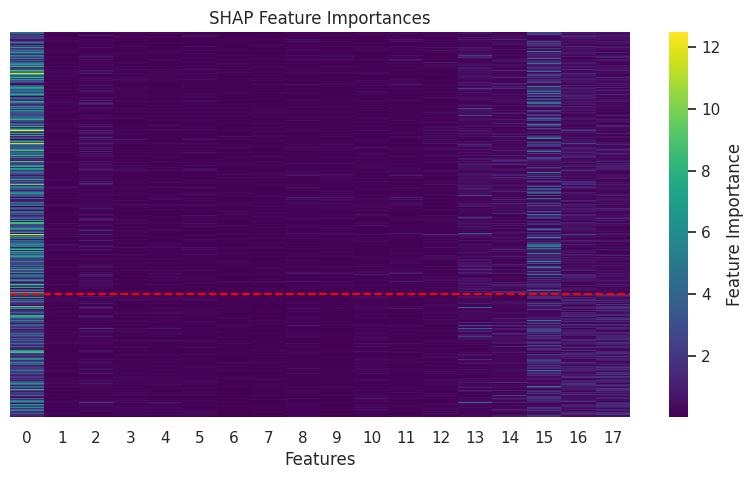

<Figure size 1000x500 with 0 Axes>

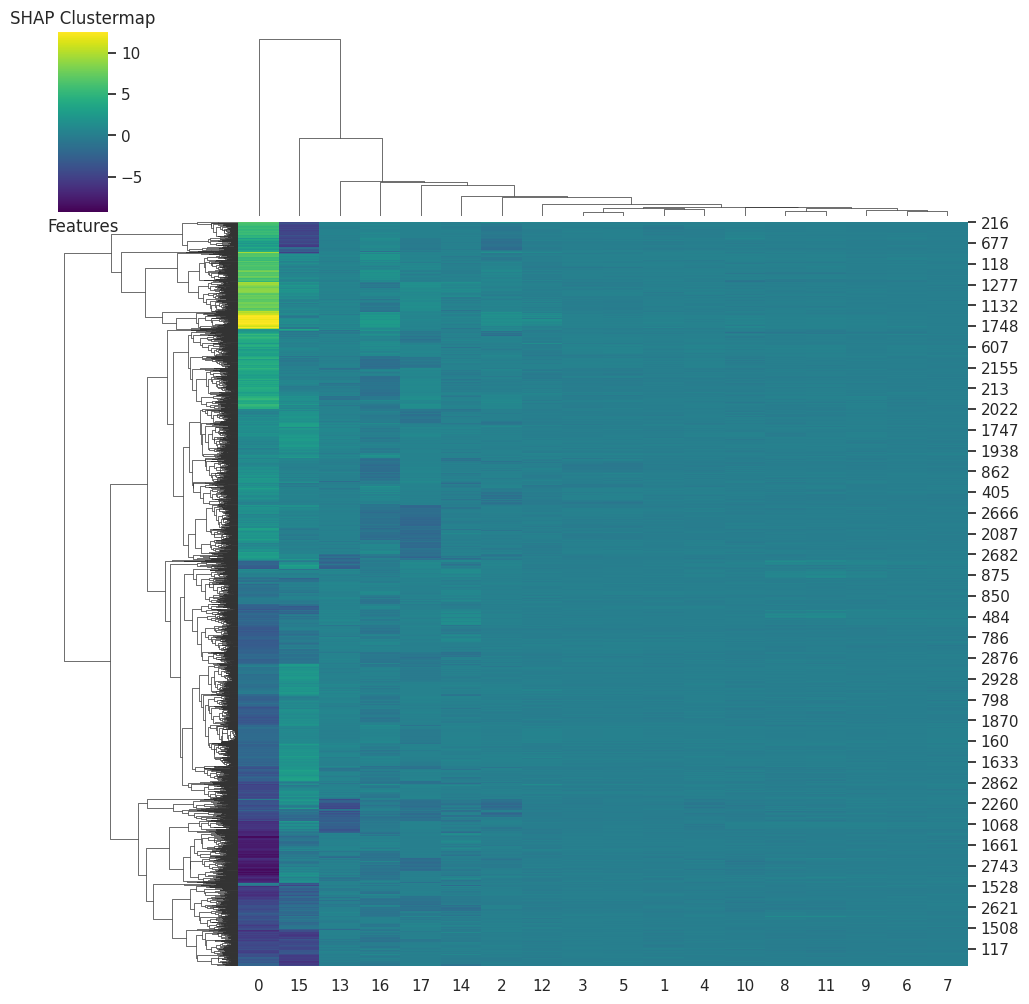

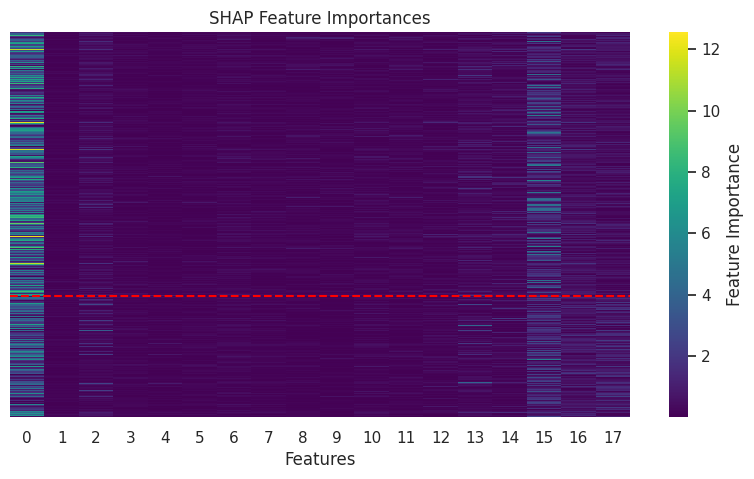

<Figure size 1000x500 with 0 Axes>

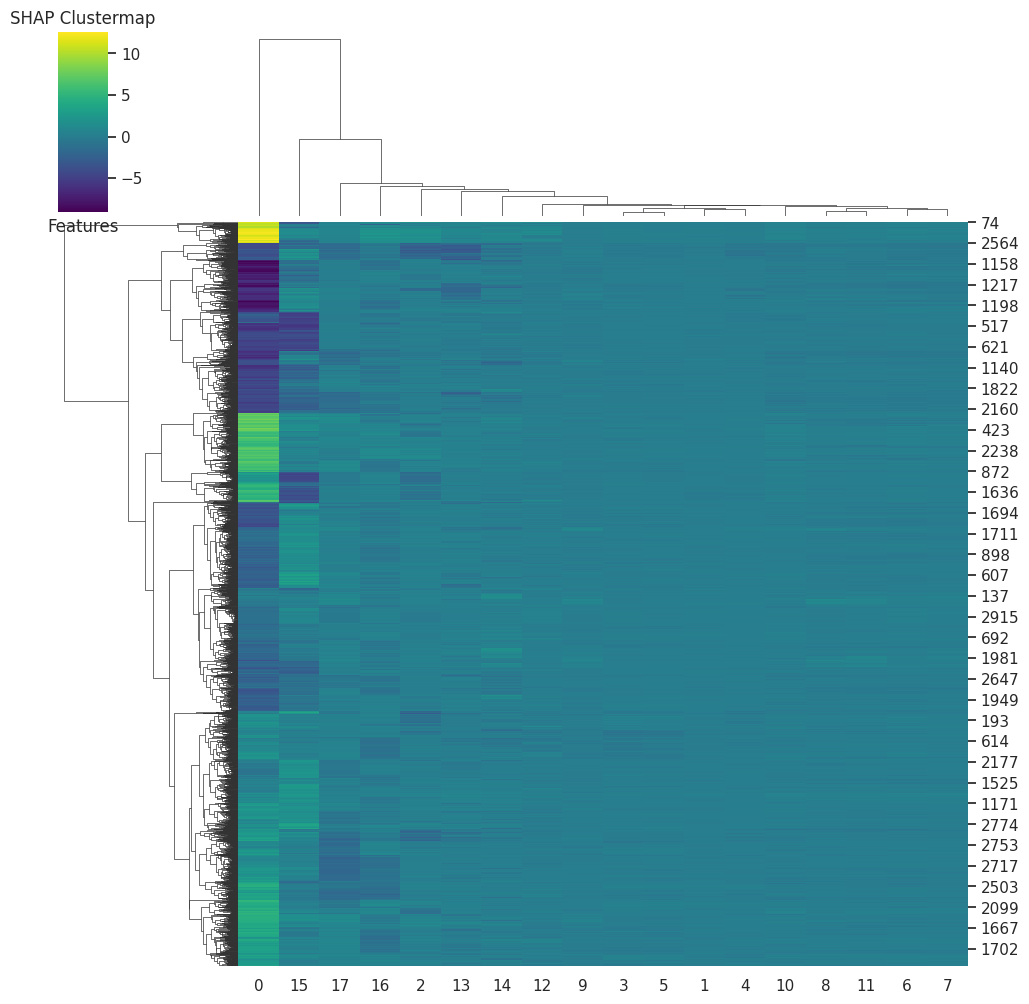

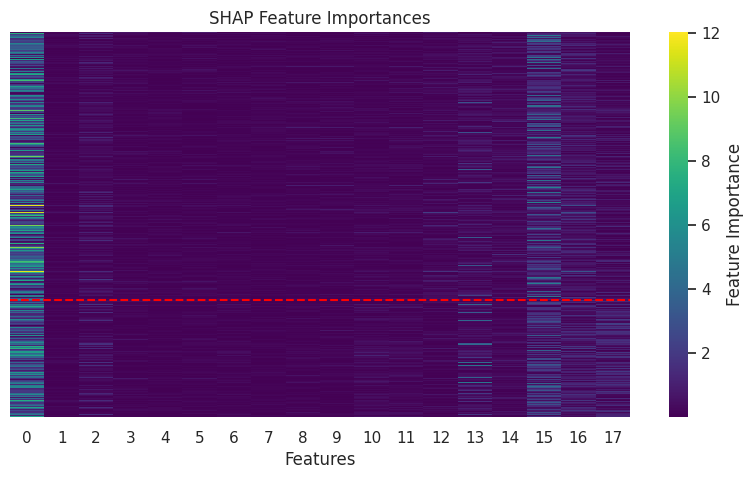

<Figure size 1000x500 with 0 Axes>

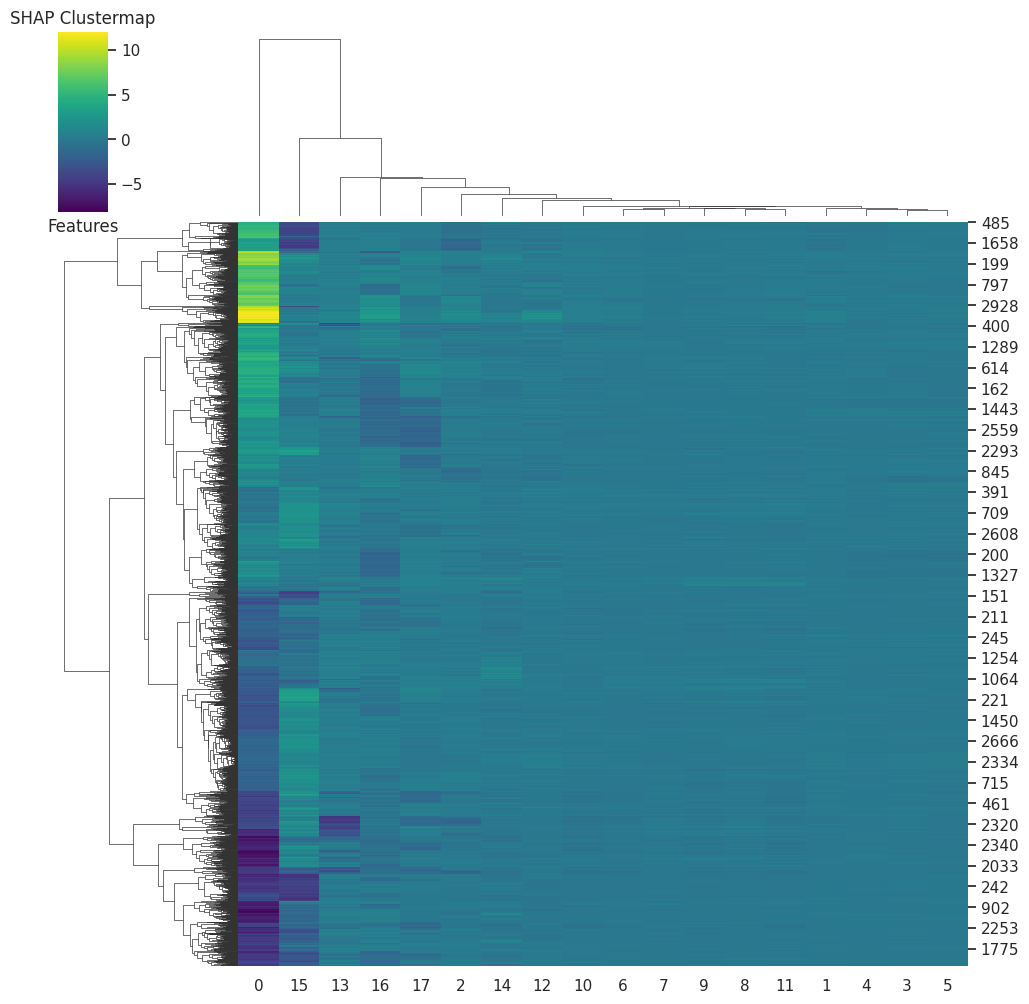

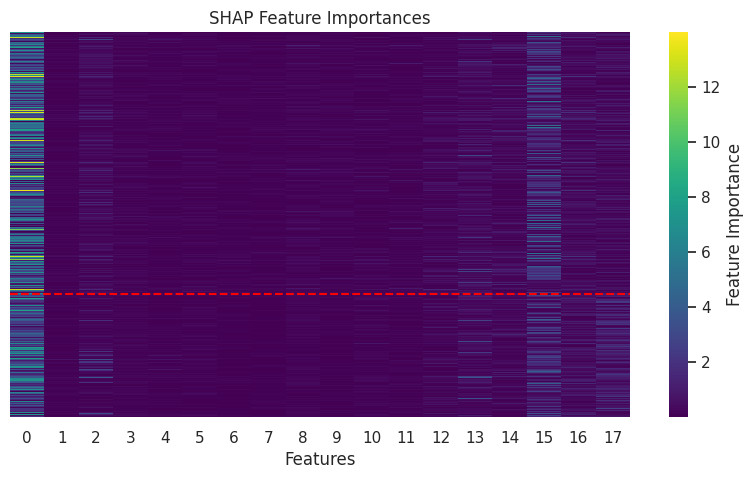

<Figure size 1000x500 with 0 Axes>

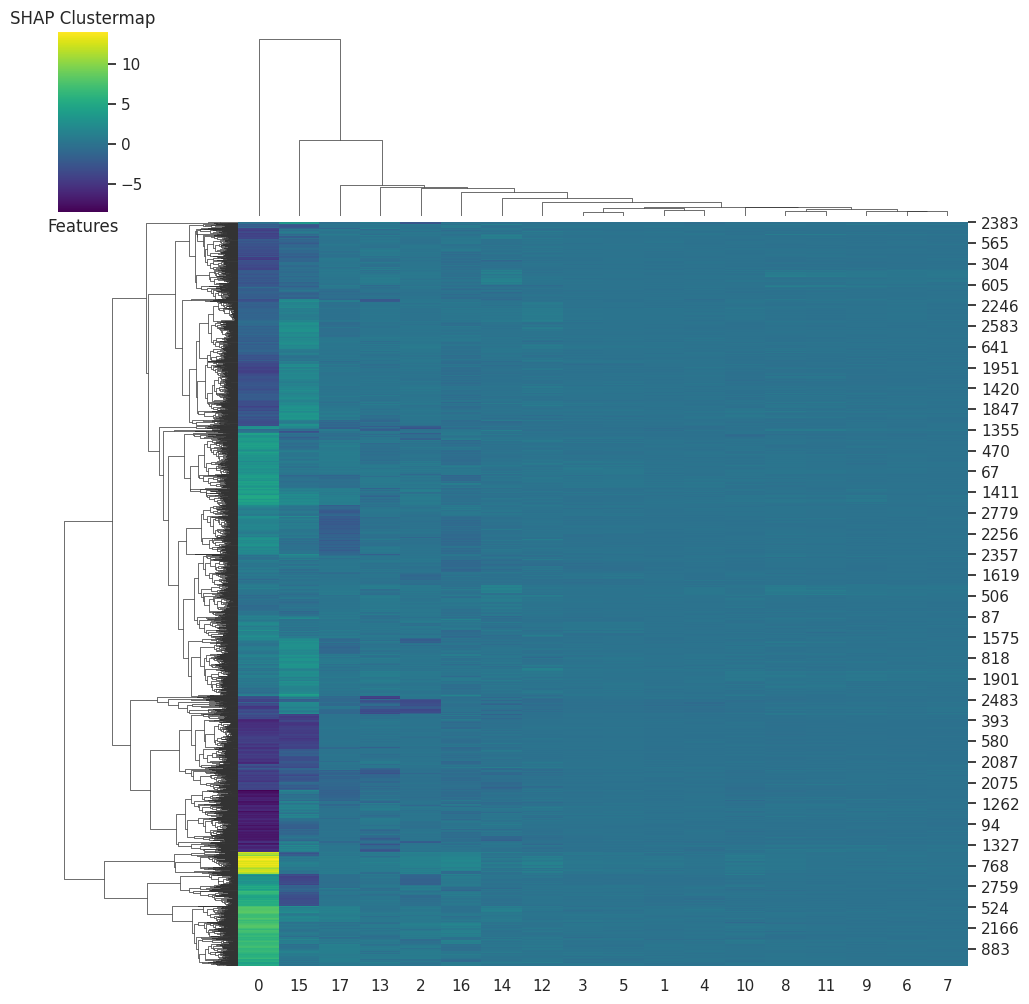

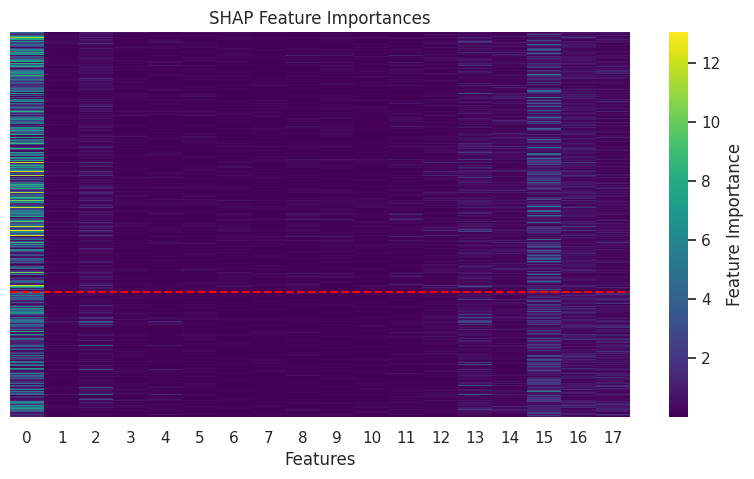

<Figure size 1000x500 with 0 Axes>

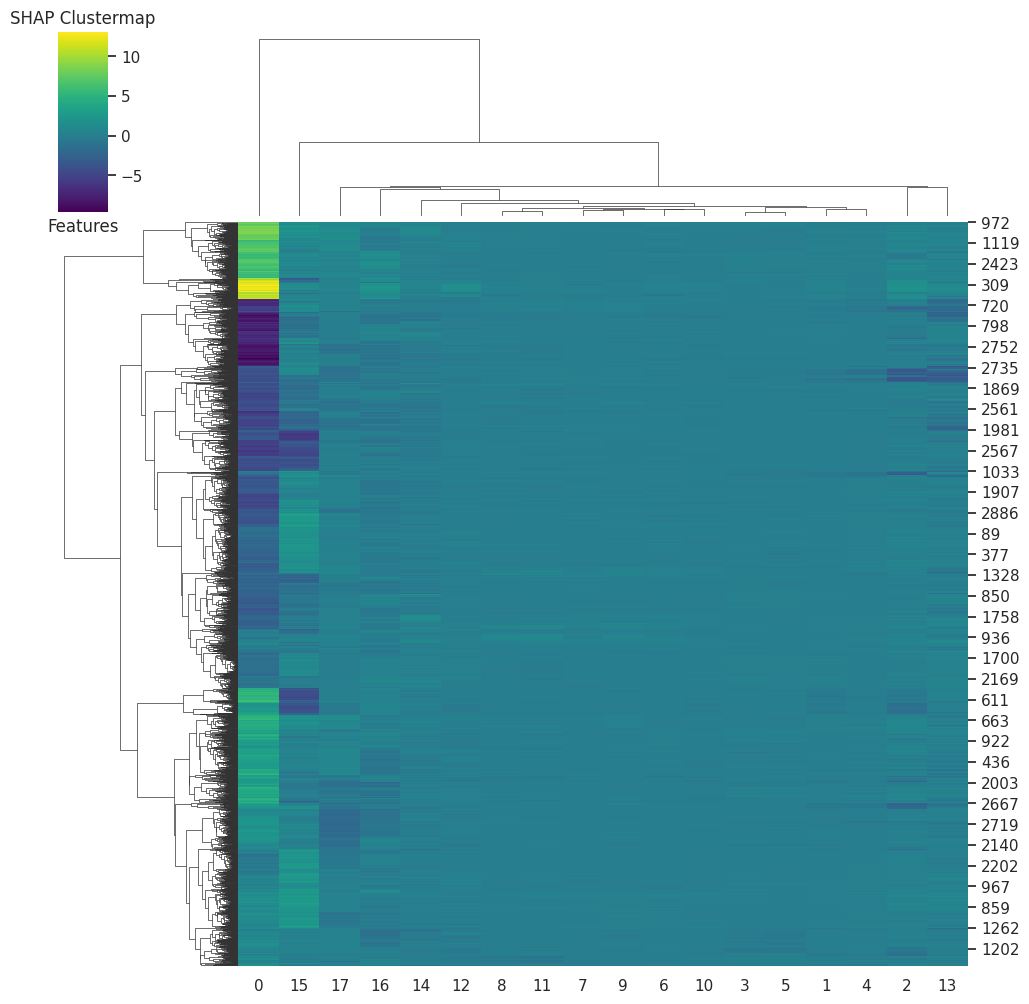

In [10]:
# plot heatmap of lotla values
import matplotlib.pyplot as plt
import seaborn as sns
for i in range(5):
    sns.set()
    plt.figure(figsize=(10, 5))
    sns.heatmap(np.abs(shap_values[i]), cmap="viridis", cbar_kws={'label': 'Feature Importance'})
    plt.title("SHAP Feature Importances")
    plt.xlabel("Features")
    plt.ylabel("")
    plt.axhline(y=women_count[i], color='red', linestyle='--')
    plt.yticks([])
    plt.show()
    sns.set()
    plt.figure(figsize=(10, 5))
    sns.clustermap(shap_values[i], cmap="viridis", cbar_kws={'label': 'Feature Importance'})
    plt.title("SHAP Clustermap")
    plt.xlabel("Features")
    plt.ylabel("")
    plt.show()

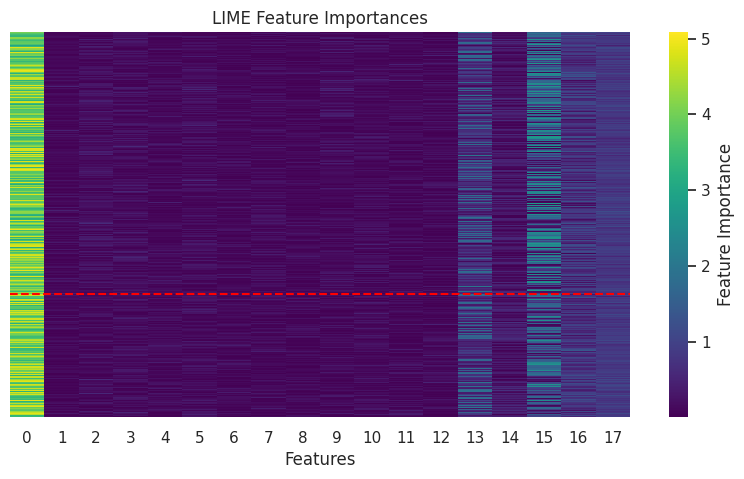

<Figure size 1000x500 with 0 Axes>

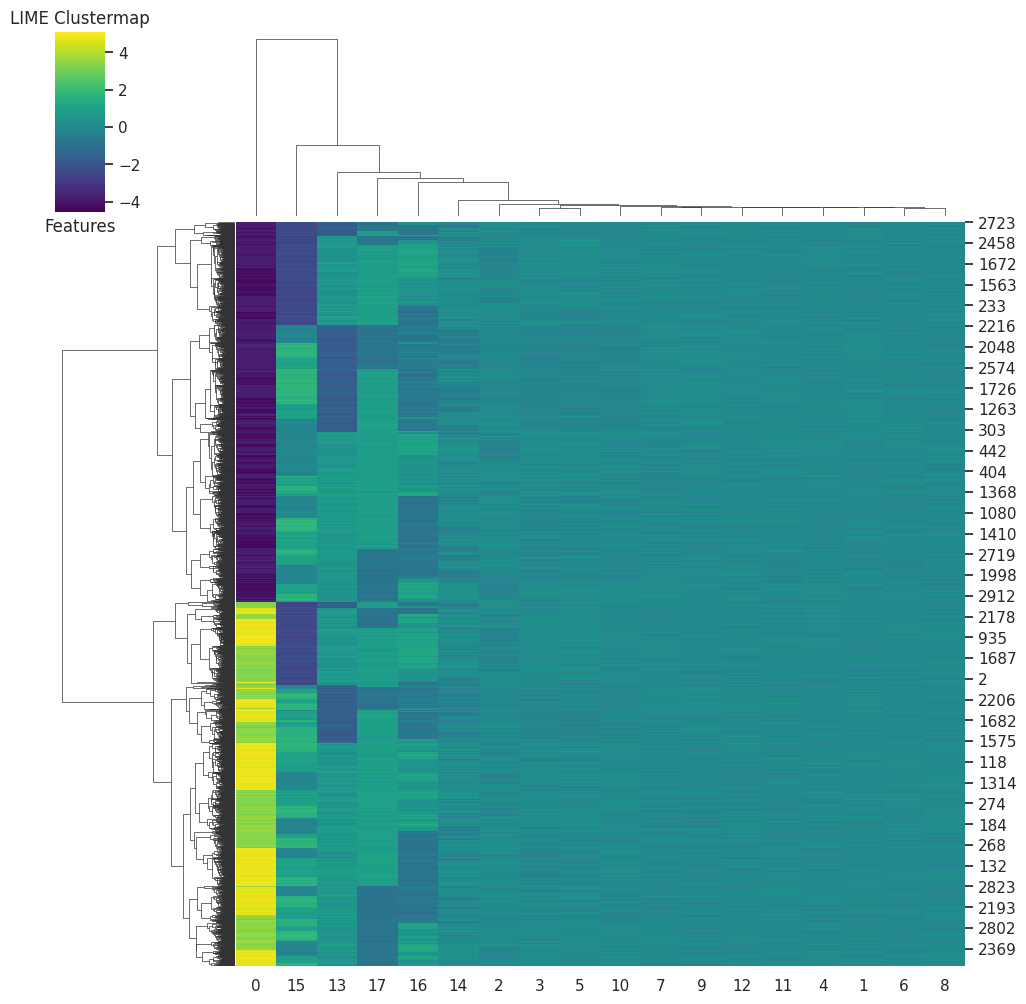

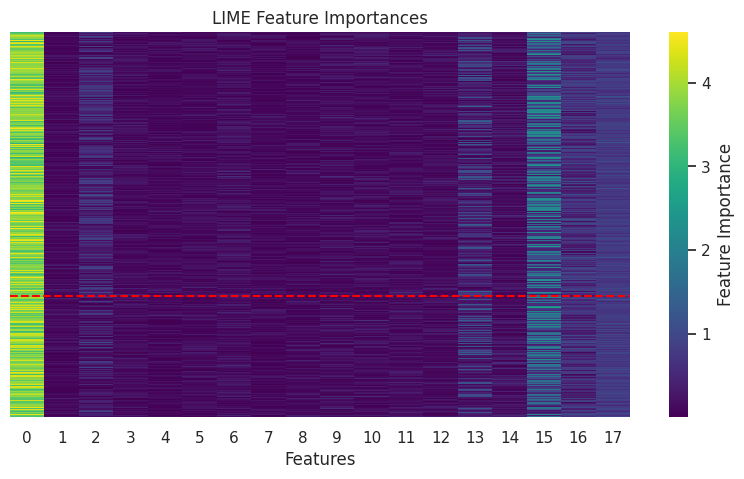

<Figure size 1000x500 with 0 Axes>

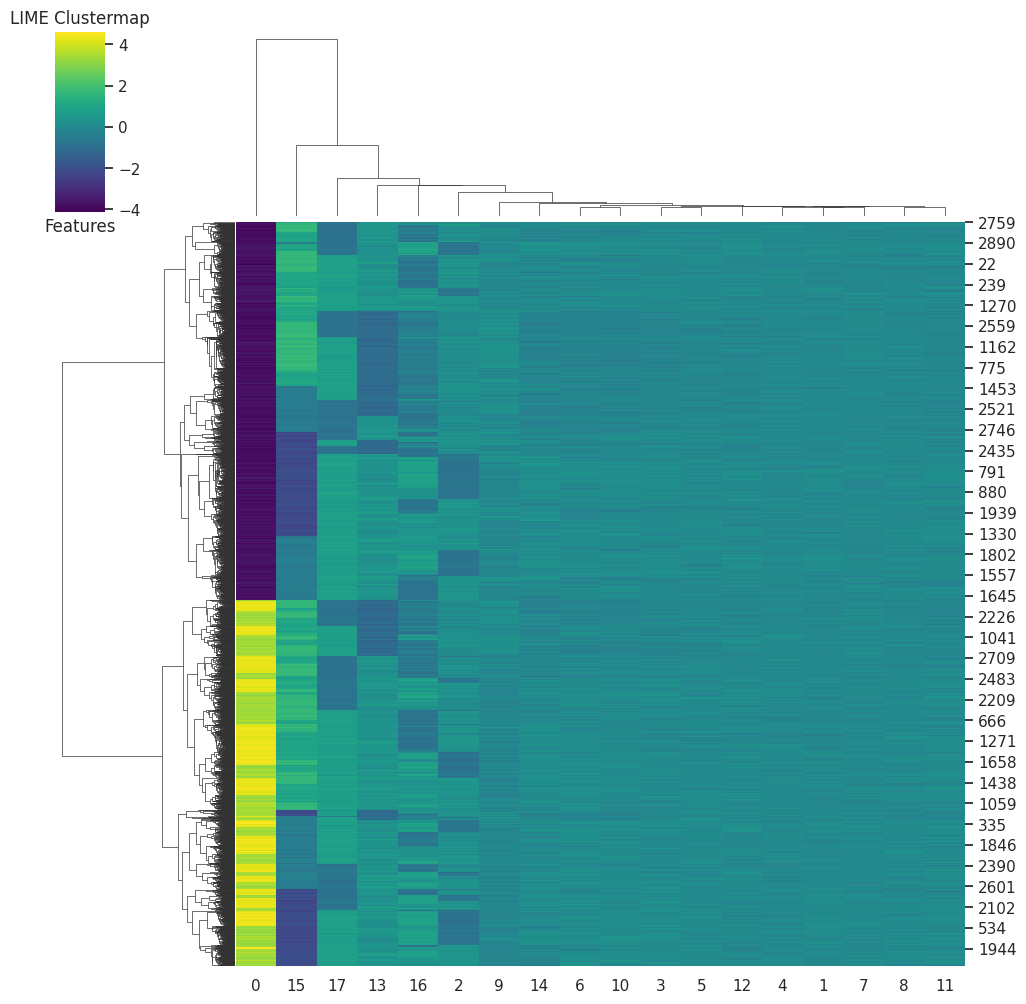

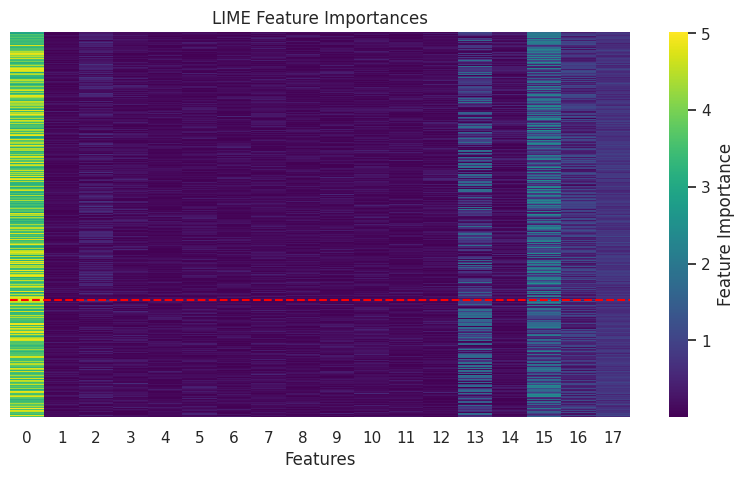

<Figure size 1000x500 with 0 Axes>

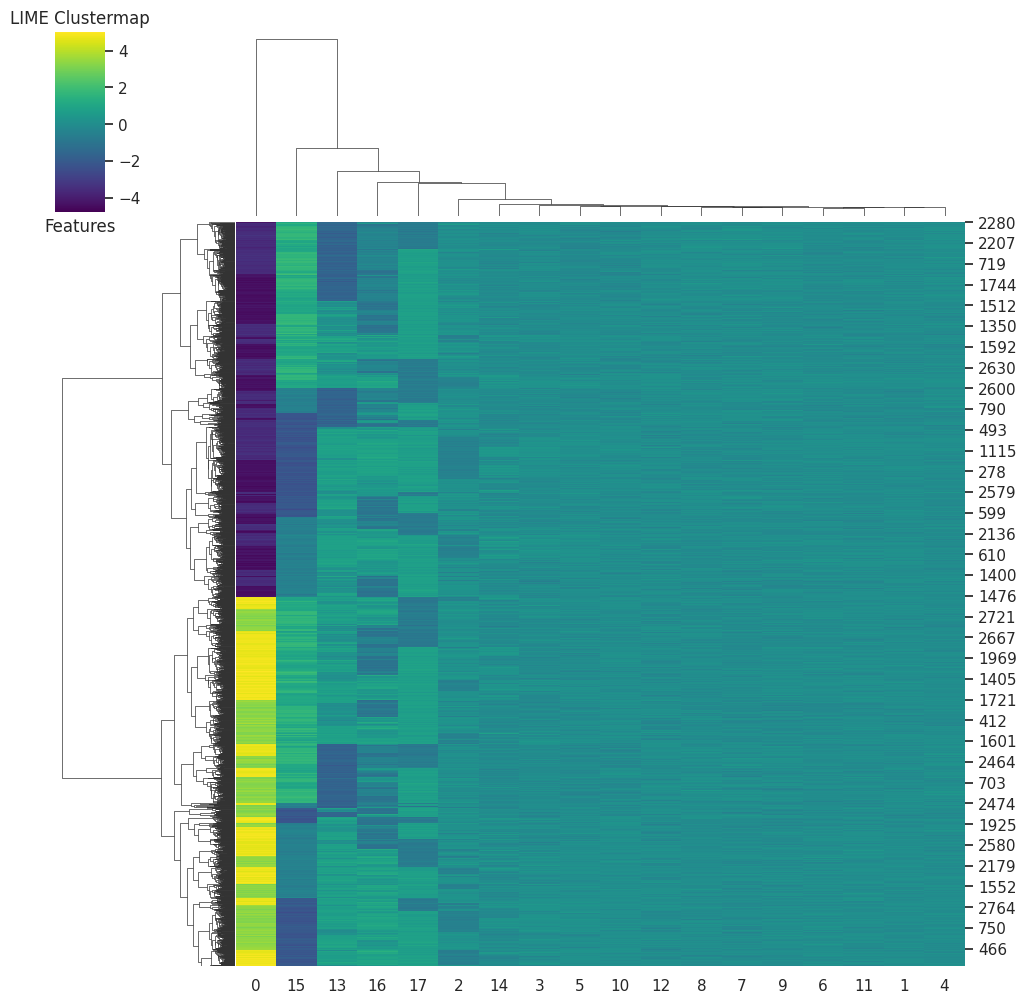

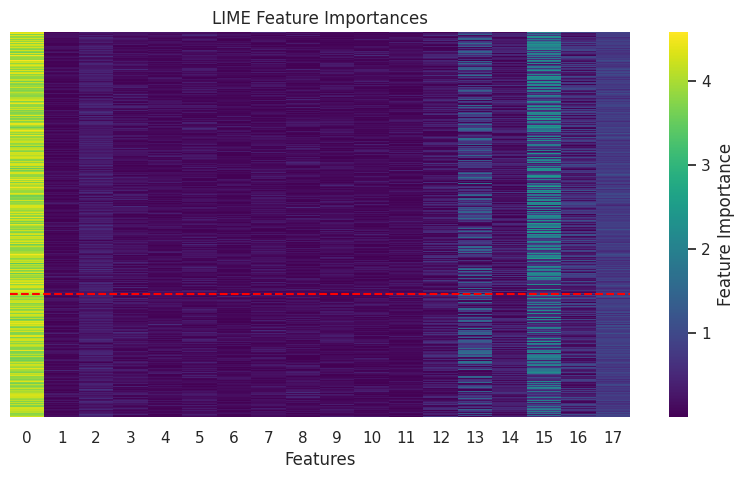

<Figure size 1000x500 with 0 Axes>

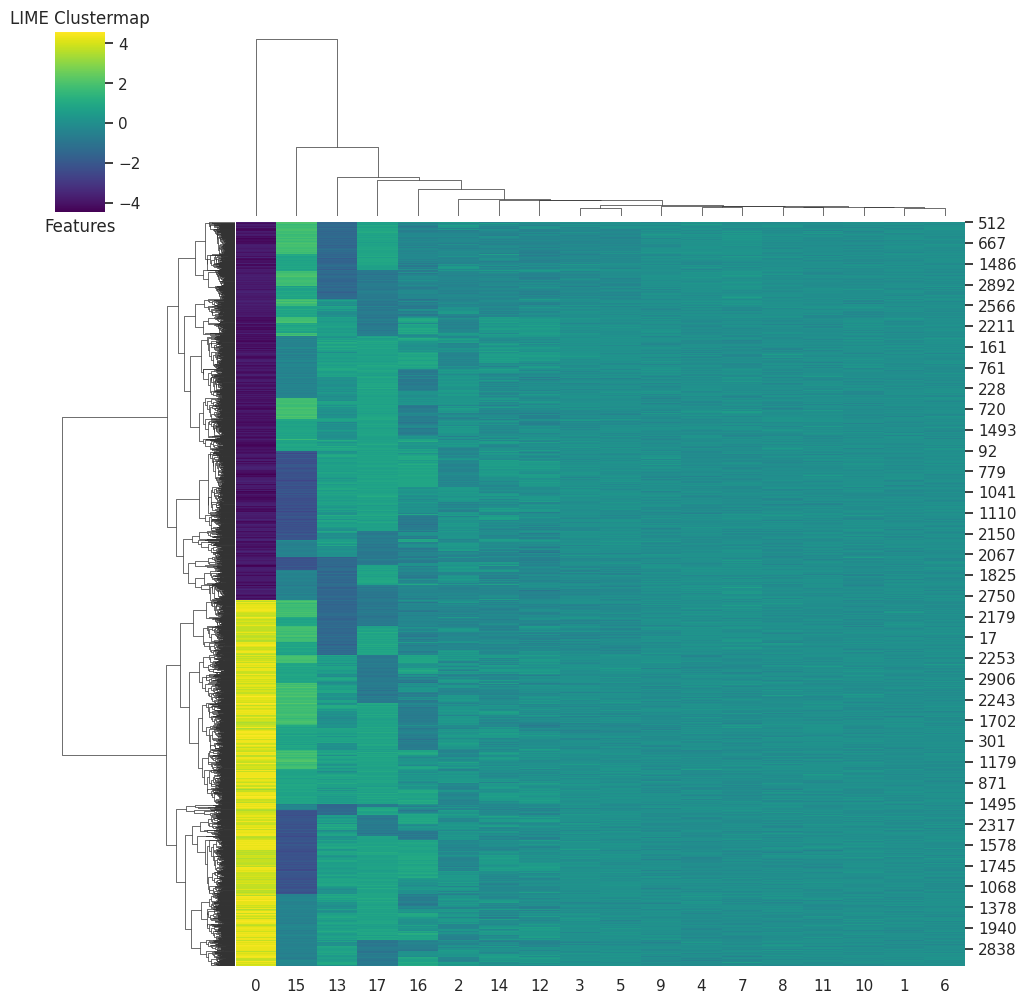

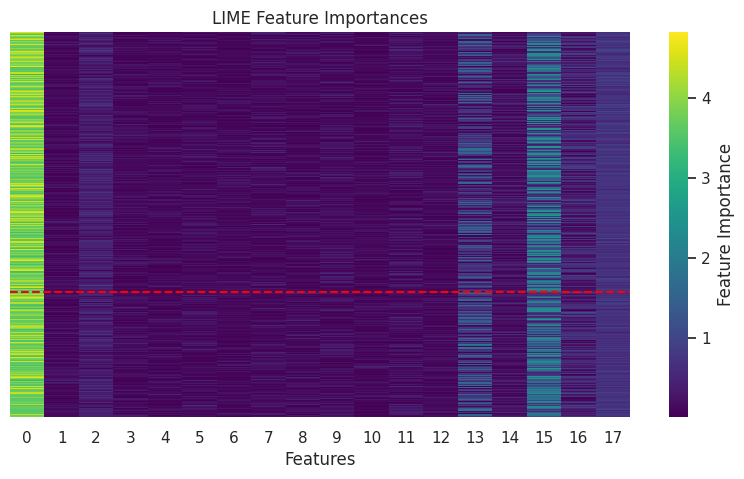

<Figure size 1000x500 with 0 Axes>

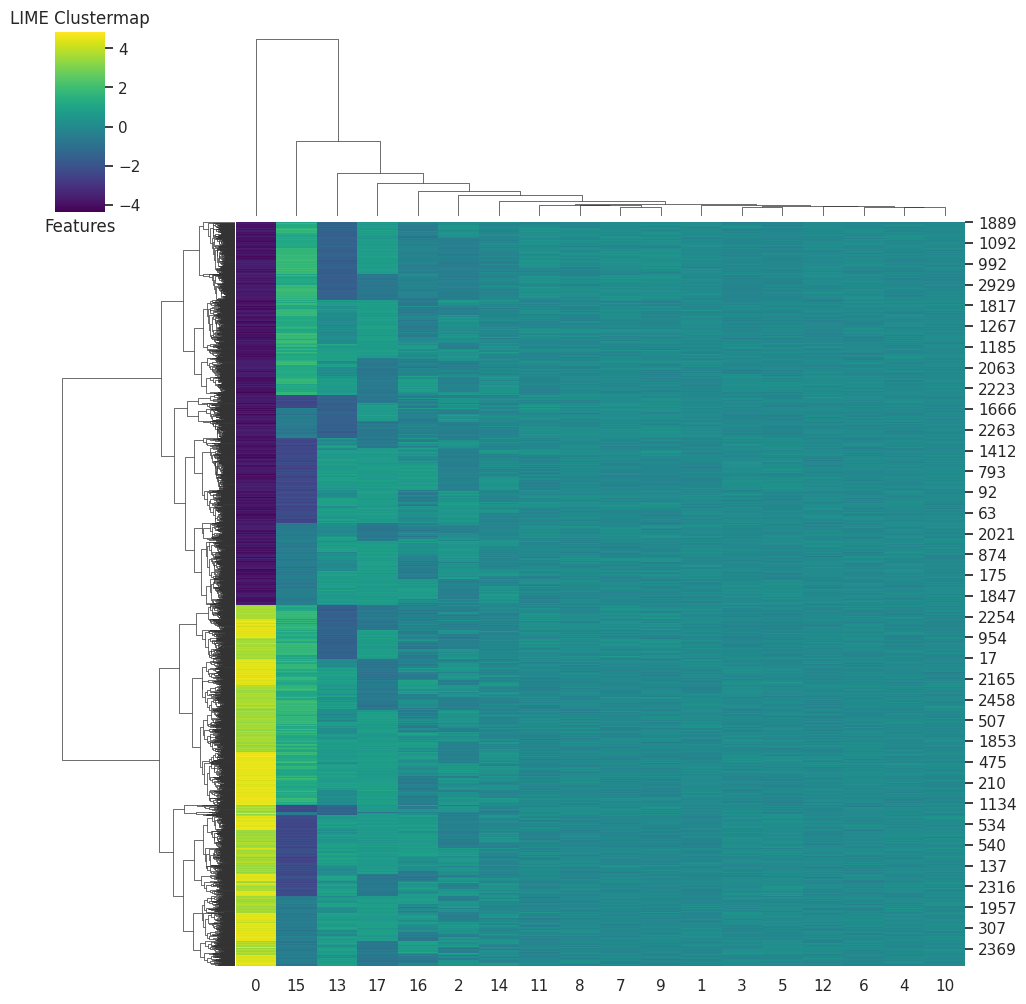

In [11]:
# plot heatmap of lotla values
import matplotlib.pyplot as plt
import seaborn as sns
for i in range(5):
    sns.set()
    plt.figure(figsize=(10, 5))
    sns.heatmap(np.abs(lime_values[i]), cmap="viridis", cbar_kws={'label': 'Feature Importance'})
    plt.title("LIME Feature Importances")
    plt.xlabel("Features")
    plt.ylabel("")
    plt.axhline(y=women_count[i], color='red', linestyle='--')
    plt.yticks([])
    plt.show()
    sns.set()
    plt.figure(figsize=(10, 5))
    sns.clustermap(lime_values[i], cmap="viridis", cbar_kws={'label': 'Feature Importance'})
    plt.title("LIME Clustermap")
    plt.xlabel("Features")
    plt.ylabel("")
    plt.show()

In [12]:
feat2_imp_women = lotla_values[0][:, 2][X_test['sex_1']==0]
feat2_imp_men = lotla_values[0][:, 2][X_test['sex_1']==1]

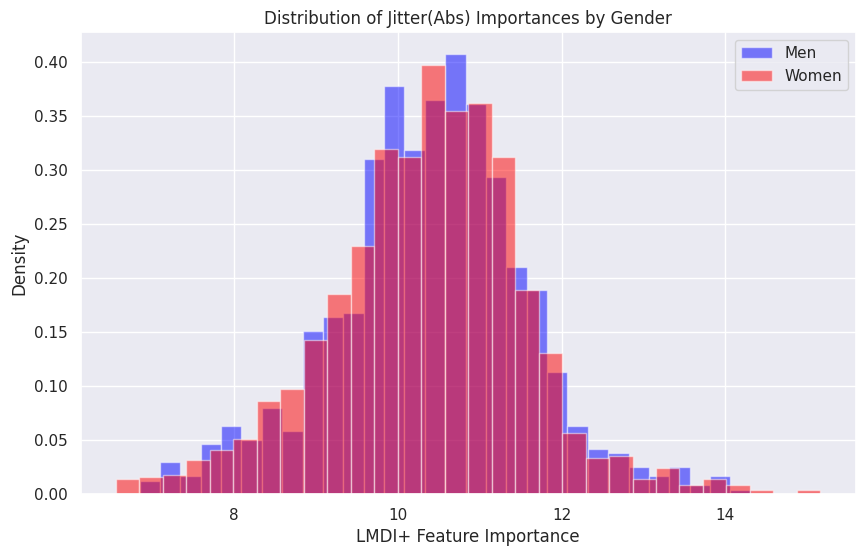

In [13]:
# plot histogram of dfa_imp_women and dfa_imp_men on top of each other
plt.figure(figsize=(10, 6))
plt.hist(feat2_imp_men, color='blue', density=True, bins=30, alpha=0.5, label="Men")
plt.hist(feat2_imp_women, color='red', density=True, bins=30, alpha=0.5, label="Women")
# make legend that says blue is men and red is women
plt.legend()
plt.xlabel("LMDI+ Feature Importance")
plt.ylabel("Density")
plt.title("Distribution of " + X.columns[2] + " Importances by Gender")
plt.show()

In [14]:
DFA_imp_women = lotla_values[0][:, 15][X_test['sex_1']==0]
DFA_imp_men = lotla_values[0][:, 15][X_test['sex_1']==1]

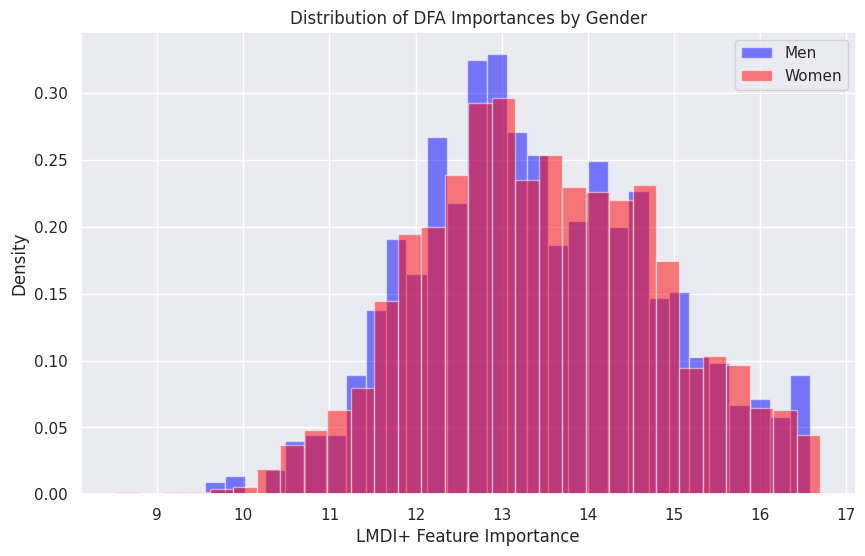

In [15]:
# plot histogram of dfa_imp_women and dfa_imp_men on top of each other
plt.figure(figsize=(10, 6))
plt.hist(DFA_imp_men, color='blue', density=True, bins=30, alpha=0.5, label="Men")
plt.hist(DFA_imp_women, color='red', density=True, bins=30, alpha=0.5, label="Women")
# make legend that says blue is men and red is women
plt.legend()
plt.xlabel("LMDI+ Feature Importance")
plt.ylabel("Density")
plt.title("Distribution of " + X.columns[15] + " Importances by Gender")
plt.show()

In [16]:
X_test.shape

(2938, 18)

In [18]:
# for each seed, cluster the lotla importances
for i in range(5):
    print(f"Seed {i}:")
    # split data into training and testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5,
                                                        random_state = seed)
    lotla_values[seed] = np.loadtxt(base_dir + f"seed{seed}/parkinsons/elastic_nonnormed_nosquared_rank.csv", delimiter=",")
    for nclust in range(2, 6):
        print("--------------------")
        # get k clusters through k-means clustering
        kmeans = KMeans(n_clusters=nclust, random_state=0).fit(lotla_values[i])
        cluster_labels = kmeans.labels_
        # print proportion of men & women in each cluster
        for k in range(nclust):
            print(f"Cluster {k+1}:", np.mean(X_test[cluster_labels==k].loc[:, "sex_1"]))

Seed 0:
--------------------
Cluster 1: 0.32748948106591863
Cluster 2: 0.3253968253968254
--------------------
Cluster 1: 0.34094616639477976
Cluster 2: 0.3243697478991597
Cluster 3: 0.320704845814978
--------------------
Cluster 1: 0.3062409288824383
Cluster 2: 0.3256972111553785
Cluster 3: 0.32727272727272727
Cluster 4: 0.35578947368421054
--------------------
Cluster 1: 0.3189910979228487
Cluster 2: 0.32540861812778604
Cluster 3: 0.3266078184110971
Cluster 4: 0.3584905660377358
Cluster 5: 0.3114754098360656
Seed 1:
--------------------
Cluster 1: 0.32002801120448177
Cluster 2: 0.33245033112582784
--------------------
Cluster 1: 0.3195121951219512
Cluster 2: 0.3404878048780488
Cluster 3: 0.31771595900439237
--------------------
Cluster 1: 0.32177033492822965
Cluster 2: 0.32228915662650603
Cluster 3: 0.3128834355828221
Cluster 4: 0.3403582718651212
--------------------
Cluster 1: 0.3216216216216216
Cluster 2: 0.3327556325823224
Cluster 3: 0.3434065934065934
Cluster 4: 0.33294663573085

In [19]:
# for each seed, cluster the lotla importances
for i in range(5):
    print(f"Seed {i}:")
    # split data into training and testing
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5,
                                                        random_state = seed)
    lotla_values[seed] = np.loadtxt(base_dir + f"seed{seed}/parkinsons/elastic_nonnormed_nosquared_rank.csv", delimiter=",")
    # get the linkage for hierarchical clustering with ward
    Z = linkage(lotla_values[i], method='ward')
    for nclust in range(2, 6):
        print("--------------------")
        # get k clusters through hierarchical clustering
        cluster_labels = cut_tree(Z, nclust)
        # print proportion
        for k in range(nclust):
            print(f"Cluster {k+1}:", np.bincount(X_test[cluster_labels==k].loc[:, "sex_1"])/X_test[cluster_labels==k].shape[0])

Seed 0:
--------------------
Cluster 1: [0.67275495 0.32724505]
Cluster 2: [0.67426108 0.32573892]
--------------------
Cluster 1: [0.67275495 0.32724505]
Cluster 2: [0.6826087 0.3173913]
Cluster 3: [0.65400844 0.34599156]
--------------------
Cluster 1: [0.67275495 0.32724505]
Cluster 2: [0.6826087 0.3173913]
Cluster 3: [0.65217391 0.34782609]
Cluster 4: [0.65517241 0.34482759]
--------------------
Cluster 1: [0.66751269 0.33248731]
Cluster 2: [0.6826087 0.3173913]
Cluster 3: [0.65217391 0.34782609]
Cluster 4: [0.68060837 0.31939163]
Cluster 5: [0.65517241 0.34482759]
Seed 1:
--------------------
Cluster 1: [0.67405405 0.32594595]
Cluster 2: [0.67279412 0.32720588]
--------------------
Cluster 1: [0.67870579 0.32129421]
Cluster 2: [0.6621881 0.3378119]
Cluster 3: [0.67279412 0.32720588]
--------------------
Cluster 1: [0.64393939 0.35606061]
Cluster 2: [0.70162297 0.29837703]
Cluster 3: [0.6621881 0.3378119]
Cluster 4: [0.67279412 0.32720588]
--------------------
Cluster 1: [0.6439393